In [1]:
import os

import numpy as np
import zarr
import xarray as xr
import h5py
import s3fs
import geoh5py
from geoh5py.workspace import Workspace

import fsspec

import kerchunk.hdf
from kerchunk.hdf import SingleHdf5ToZarr

import configparser
import contextlib

import pyvista as pv
import pandas as pd
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

from tqdm import tqdm
import pickle



## Preparation

To make the files to enable this analysis, the excellent Shepard framework was used to set up AWS Batch.

https://github.com/ginkgobioworks/shepard

I needed to run approximately one hundred thousand jobs to do this.
    
Basically, you upload a file with information to the s3 bucket for shepard - the location of the Geoscience Analyst .geoh5 file.    

The Dockerfile setup for this is included in the repository.

The code to do this

In [ ]:
    
import os
import fsspec
import s3fs
import json

from kerchunk.hdf import SingleHdf5ToZarr
import kerchunk.hdf

root_input_name = os.getenv('ROOT_INPUT_NAME')
input_zip_name = os.getenv('INPUT_ZIP_NAME')
tag = os.getenv('tag')
key = os.getenv('BANASPLITS-NUMBER') #file to get
root_output_name = os.getenv('ROOT_OUTPUT_NAME')

s3 = s3fs.S3FileSystem(anon=False, key='ACCESS_KEY', secret='SECRET_ACCESS_KEY')

urls = ["s3://" + p for p in [
    'Banana-Splits' + key + '.geoh5'
]]
so = dict(
    anon=False, default_fill_cache=False, default_cache_type='first'
)
singles = []
for u in urls:
    with s3.open(u, **so) as inf:
        h5chunks = kerchunk.hdf.SingleHdf5ToZarr(inf, u, inline_threshold=100)
        singles.append(h5chunks.translate())

print(singles)

with open(os.path.join(root_output_name, key + '.json'),'w') as f:
    json.dump(singles[0], f)

print("FINISHED!")

In [3]:
def get_aws_credentials():
    parser = configparser.RawConfigParser()
    parser.read(os.path.expanduser('~/.aws/credentials'))
    credentials = parser.items('bananasplits')
    all_credentials = {key.upper(): value for key, value in [*credentials]}
    with contextlib.suppress(KeyError):
        all_credentials["AWS_REGION"] = all_credentials.pop("REGION")
    return all_credentials

creds = get_aws_credentials()

In [ ]:
All the output json files for kerchunk get returned to an output bucket

In [4]:
s3 = s3fs.S3FileSystem(profile='bananasplits')

r_opts = {
    "key": creds['AWS_ACCESS_KEY_ID'],
    "secret": creds['AWS_SECRET_ACCESS_KEY'],
    "client_kwargs": {"region_name": "us-west-2"},
}

m = fsspec.get_mapper("reference://", fo=r'F:\BananaSplits\42023.json', remote_protocol="s3", remote_options=r_opts)
z = zarr.open(m)

In [6]:
z.info

Name,/
Type,zarr.hierarchy.Group
Read-only,False
Store type,fsspec.mapping.FSMap
No. members,1
No. arrays,0
No. groups,1
Groups,GEOSCIENCE


In [17]:
for name in z:
    print(name)

GEOSCIENCE


In [19]:
z['GEOSCIENCE']

<zarr.hierarchy.Group '/GEOSCIENCE'>

In [20]:
z['GEOSCIENCE'].info

Name,/GEOSCIENCE
Type,zarr.hierarchy.Group
Read-only,False
Store type,fsspec.mapping.FSMap
No. members,4
No. arrays,0
No. groups,4
Groups,"Data, Groups, Objects, Types"


In [21]:
z['GEOSCIENCE']['Data'].info

Name        : /GEOSCIENCE/Data
Type        : zarr.hierarchy.Group
Read-only   : False
Store type  : fsspec.mapping.FSMap
No. members : 164
No. arrays  : 0
No. groups  : 164
Groups      : {00e6c2c7-eefe-4618-b9e6-3fc08177b96b},
            : {025ac2f5-7bc7-4e59-a489-0c337d8b40f9}, {033923cb-
            : ca1d-4a38-ab2d-efe79c8aec75},
            : {04e8731c-7a1a-4892-821e-8503de0f88b4},
            : {069c898e-553c-400e-8b3f-06e6103dfb73},
            : {06f97b0b-80a1-4ba9-9cb2-df10e77ca0e4},
            : {0aab3744-f5fb-4425-aa48-28e08c832a74},
            : {0b3c983a-bc93-479b-b115-5e1fabfa2547},
            : {0bc10125-95ed-45c4-bdde-4a229f80f127},
            : {0e12eee0-20af-4fdd-b1af-f59a88f21112},
            : {109b38b4-ce97-46c1-86e5-a474e034a8af},
            : {1231dc31-2708-4d69-96ec-b71f2333f0c7},
            : {12f1d3df-4067-4595-9a5c-3a0624444f93}, {13cbfd16-70a3-4b92-97ad-
            : ac5ee1650071}, {17636e0d-eeb7-4eaa-a0d0-948c70a13a99},
            : {18d0afff-3053-447c-a978-960c550c7bb0},
            : {193447e1-bab7-42ba-a9f6-f1d359850d27},
            : {1c305355-960a-4273-830b-8eb67e3d0bbb},
            : {1ca2ea4a-0c09-4b7b-9ae3-133e54a06ccf}, {1ea96c38-58e7-4d7f-acef-
            : dd674024445e}, {2025c3ec-2e14-4fae-9d6d-5683c0332740},
            : {22520f8c-5247-49ba-905f-23e0bf92384d},
            : {226a6375-984c-4c7f-8aaf-d727f9ad9d7f},
            : {23c18a48-be93-4010-b354-ceb057bd8712},
            : {24001da4-5ea6-4574-a288-2f52108ca5aa},
            : {25b66db6-a1c9-4994-8533-4749d76c8c55},
            : {26824c05-6992-4024-9dae-46129d723ac3},
            : {28a77cdd-a024-45a9-9d03-2fbb786e0aaa},
            : {28aefc21-3778-4dc1-8b25-63bb6f4e13ad}, {290117af-
            : aa4f-452b-bcc9-47a349d20666},
            : {2b862ea1-ea82-443d-bfa4-7cfcf8420001},
            : {2c74c39d-8971-48fa-8014-66bbd794dd60},
            : {2ca89aaa-a906-49d7-bb63-7e53acb4eb44},
            : {2d0c1fbe-5649-40bd-8b77-86a5b3011ee4},
            : {2f5fcd4b-865b-4403-86fd-709fa4a3285e},
            : {2f768724-f035-4470-8e88-feec32e90d25},
            : {31478a65-46e5-4d18-8bec-c7542e0641a0},
            : {3158da0d-0159-47f4-81a4-dd11a66fedad},
            : {326b7a7f-3ea3-4e12-986b-458f22ed4006},
            : {38017109-cae5-4574-902c-7aa35e13775a},
            : {3b3a04ad-1ee4-4d98-a903-8708befca202},
            : {3be07179-30c9-4455-9e84-8706aa11f7f7}, {3c9050ce-
            : fa4c-4b19-ad6f-1d9dc1262725},
            : {3f0d56d1-9e16-4fe7-9e76-6c303d68ef0b}, {3fe2ffb8-d2a7-49f5-b9ef-
            : aeb1341e94dc}, {42d17a4d-1a78-4dbd-bfbb-97edcedb10c2},
            : {43282a8f-8a05-4199-b9d2-475e9ffef5ae},
            : {4389f6e9-39b1-4702-9b1b-9c373b62b5ab},
            : {452ae902-926a-4024-84d7-666368fad120},
            : {45728055-d3c5-4c8a-9055-f9c43fb695ed},
            : {4584383c-c504-44c1-992e-e3c130aba627},
            : {49bf2f3f-d72f-421a-9562-23ca29b8596b},
            : {4b12b0b9-ed53-4bb5-8fa6-a4cd54ae629e},
            : {4c26bb3a-6671-4479-92d3-ceeaabc10d95},
            : {4dc7abea-2dc5-4405-b5e7-392a7a8b8255},
            : {5119b52e-4d7f-4ca0-93e6-125be021daba},
            : {5273f614-da35-4eab-b9b1-b0ead597bfc7},
            : {5366abc1-b0e1-4acc-a3a2-5898f43aad99},
            : {5462f485-c3b6-4062-a9da-7859d766d416},
            : {5474992e-9351-40ac-8ba0-a7e663bbbdd6},
            : {549c3071-830f-47d6-a6ad-e10c425a6488}, {55bbe6cd-
            : fdf0-4edd-9594-d66fece51657},
            : {58ae4583-567b-4281-92c4-ed20bc60a73e},
            : {5acd4af9-680d-4903-a5fd-a93e84987dc1},
            : {5b7ebadd-1e47-4280-a235-b4ec91dd930d},
            : {5b90ae54-5bce-4085-b438-90190f946062},
            : {5c461d4f-673b-4d32-b62d-cd21a43c00f6},
            : {5cd912a8-3b52-4ad6-bf60-cb66e513237e},
            : {5ee81608-9021-4fb1-b276-aa63c5961622},
            : {60be96b5-d15c-4a4d-9759-8f5445324446},
            : {6125aa47-d121-415d-a89b-f15148bf9d0b},
            : {622ec558-9840

In [27]:
z['GEOSCIENCE']['Data']['{00e6c2c7-eefe-4618-b9e6-3fc08177b96b}']

<zarr.hierarchy.Group '/GEOSCIENCE/Data/{00e6c2c7-eefe-4618-b9e6-3fc08177b96b}'>

In [32]:
z['GEOSCIENCE']['Data']['{00e6c2c7-eefe-4618-b9e6-3fc08177b96b}']['Data']

<zarr.core.Array '/GEOSCIENCE/Data/{00e6c2c7-eefe-4618-b9e6-3fc08177b96b}/Data' (29359,) float64>

In [29]:
import numpy as np
np.histogram(z['GEOSCIENCE']['Data']['{00e6c2c7-eefe-4618-b9e6-3fc08177b96b}']['Data'])

(array([27540,     0,     0,     0,     0,     0,     0,     0,     0,
         1819], dtype=int64),
 array([0.00000000e+00, 9.99999997e-08, 1.99999999e-07, 2.99999999e-07,
        3.99999999e-07, 4.99999999e-07, 5.99999998e-07, 6.99999998e-07,
        7.99999998e-07, 8.99999998e-07, 9.99999997e-07]))

After you have your output, you can use it locally or you could use online - a local example

In [ ]:
from tqdm import tqdm

hist_dict = {}

for root, dirs, files in os.walk(r'BananaSplits'):
    for file in tqdm(files, total=len(files)):
        m = fsspec.get_mapper("reference://", fo=r'F:\BananaSplits' + "\\" + file, remote_protocol="s3", remote_options=r_opts)
        z = zarr.open(m)

        for x in z['GEOSCIENCE']['Data']:
            if z['GEOSCIENCE']['Data'][x]['Data'].shape[0] > 10000 and z['GEOSCIENCE']['Data'][x]['Data'].shape[0] < 20000:
                print(file, x)
                print(np.histogram(z['GEOSCIENCE']['Data'][x]['Data']))
                hist_dict[file] = np.histogram(z['GEOSCIENCE']['Data'][x]['Data'])

Then you get histograms as above.  This was a basic usecase I wanted, to look at a part of the dataset.

In [38]:
with open(r'F:\BananaSplits\blockmodel-histograms.pkl', 'wb') as f:
    pickle.dump(hist_dict_set, f)

An example of looking for some features you might want.

In [ ]:
for x in z['GEOSCIENCE']['Groups'
    for y in z['GEOSCIENCE']['Groups'][x]:
        for a in z['GEOSCIENCE']['Groups'][x][y]:
            for b in z['GEOSCIENCE']['Groups'][x][y][a]:
                #if z['GEOSCIENCE']['Groups'][x][y][a][b].attrs['Name'] == 'BlockModel':
                print('A')
                print(z['GEOSCIENCE']['Groups'][x][y][a][b])
                print('info')
                print(z['GEOSCIENCE']['Groups'][x][y][a][b].info)
                print(z['GEOSCIENCE']['Groups'][x][y][a][b])
                print('attrs')
                for key in z['GEOSCIENCE']['Groups'][x][y][a][b].attrs:
                    print(key, z['GEOSCIENCE']['Groups'][x][y][a][b].attrs[key])
                #print(z['GEOSCIENCE']['Groups'][x][y][a][b].attrs)
                if 'BlockModel' in z['GEOSCIENCE']['Groups'][x][y][a][b].attrs:
                    print('Vert')
                print('\n\n')
                #print(z['GEOSCIENCE']['Groups'][x][y][a][b].shape[0])

In [ ]:
#example info
A
<zarr.core.Array '/GEOSCIENCE/Groups/{6c8aeb01-839f-4773-bac2-06a9227765fe}/Objects/{ddb791b1-67a3-46ad-9f29-24d16105a023}/Vertices' (625,) [('x', '<f8'), ('y', '<f8'), ('z', '<f8')]>
info
Name               : /GEOSCIENCE/Groups/{6c8aeb01-839f-4773-bac2-06a9227765fe}/O
                   : bjects/{ddb791b1-67a3-46ad-9f29-24d16105a023}/Vertices
Type               : zarr.core.Array
Data type          : [('x', '<f8'), ('y', '<f8'), ('z', '<f8')]
Shape              : (625,)
Chunk shape        : (313,)
Order              : C
Read-only          : False
Compressor         : Zlib(level=9)
Store type         : fsspec.mapping.FSMap
No. bytes          : 15000 (14.6K)
Chunks initialized : 2/2

To go further, and have a quick look at a Block Model without needing to download anything, or use any software.

  0%|                                                                                         | 0/3045 [00:00<?, ?it/s]C:\Users\rscott\AppData\Local\Continuum\anaconda3\envs\stuartshelf\lib\site-packages\pyvista\jupyter\notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(


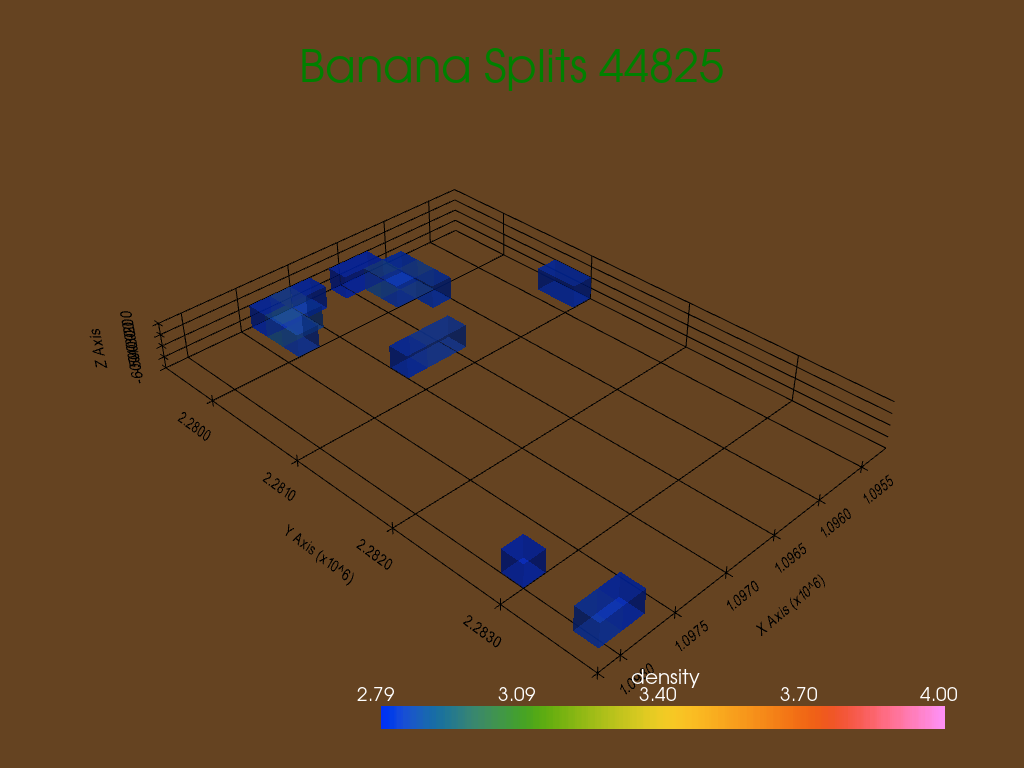

 58%|████████████████████████████████████████████▎                                | 1752/3045 [00:05<00:03, 323.84it/s]

In [ ]:
def get_aws_credentials():
    parser = configparser.RawConfigParser()
    parser.read(os.path.expanduser('~/.aws/credentials'))
    credentials = parser.items('serverlesscog')
    all_credentials = {key.upper(): value for key, value in [*credentials]}
    with contextlib.suppress(KeyError):
        all_credentials["AWS_REGION"] = all_credentials.pop("REGION")
    return all_credentials

creds = get_aws_credentials()

r_opts = {
    "key": creds['AWS_ACCESS_KEY_ID'],
    "secret": creds['AWS_SECRET_ACCESS_KEY'],
    "client_kwargs": {"region_name": "us-west-2"},
}


#Use a CET Perceptually Uniform Rainbow colormap

cet = pd.read_csv(r'C:\Users\rscott\colorpComm256_CET_USE.txt',sep=' ',header=None,names=['val','r','g','b'])
cet['r'] = cet['r']/255
cet['g'] = cet['g']/255
cet['b'] = cet['b']/255
cet['a'] = 1.0
del cet['val']

colorarray = np.asarray(cet[['r','g','b','a']])
cmapCET = ListedColormap(colorarray)

s3 = s3fs.S3FileSystem(profile='serverlesscog')

r_opts = {
    "key": creds['AWS_ACCESS_KEY_ID'],
    "secret": creds['AWS_SECRET_ACCESS_KEY'],
    "client_kwargs": {"region_name": "us-west-2"},
}

count0 = 1752


for root, dirs, files in os.walk(r'F:\BananaSplits'):
    for file in tqdm(files, total=len(files)):
        count = count + 1
        if count < count0:
            continue
        m = fsspec.get_mapper("reference://", fo=r'F:\BananaSplits' + "\\" + file, remote_protocol="s3", remote_options=r_opts)
        z = zarr.open(m)

        coords_dict = {}
        coords_dict['z'] = []
        for i in range(24):
            coords_dict['z'].append(-3400 + i*200)

        continueflag = 1
        for x in z['GEOSCIENCE']['Groups']:
            if continueflag:
                for y in z['GEOSCIENCE']['Groups'][x]:
                    for a in z['GEOSCIENCE']['Groups'][x]['Objects']:
                        for b in z['GEOSCIENCE']['Groups'][x]['Objects'][a]:
                            if 'Vertices' in b:

                                coords_dict['x'] = np.unique(z['GEOSCIENCE']['Groups'][x]['Objects'][a]['Vertices']['x'])
                                coords_dict['y'] = np.unique(z['GEOSCIENCE']['Groups'][x]['Objects'][a]['Vertices']['y'])
                                continueflag = 0
                                break
                                
        for x in z['GEOSCIENCE']['Data']:
            if z['GEOSCIENCE']['Data'][x]['Data'].shape[0] < 20000 and z['GEOSCIENCE']['Data'][x]['Data'].shape[0] >10000:
                coords_dict['data'] = z['GEOSCIENCE']['Data'][x]['Data'][:]
                break

        #make a grid for plotting in PyVista
        
        grid = pv.UniformGrid()
        grid.dimensions=np.array( [25, 25, 24] ) + 1
        grid.origin= (np.min(coords_dict['x']),np.min(coords_dict['y']), np.min(coords_dict['z']))
        grid.spacing = (200,200,200)
        grid["density"] = coords_dict['data'].reshape(25,25,24).flatten(order="F")

        index = file.replace('.json','')
        threshold = 2.79
        thres = grid.threshold(threshold)

        try:
        
            p = pv.Plotter(notebook=True)
            p.add_title("Banana Splits " + str(index), color="green", font="arial")

            p.add_mesh(mesh=thres, clim=[threshold,4], cmap=cmapCET, opacity=0.67)
            p.show_grid(color='black')
            p.set_background(color='brown')
            p.screenshot(r'F:\BananaSplits' + "\\" + "BS_" + str(index) +  '.png')
            p.show()
            p.deep_clean()
            
        except Exception as plotE:
            print("Nothing of interest in: ", index, plotE)
            with open(r'F:\BananaSplits' + "\\" + "BananaSplits_" + str(index) +  '.txt', 'w') as fn:
                fn.write("Nothing of Interest in: " + index)

        #save information for later for fast resuse as desire    
        with open('F:\BananaSplits\BS_' + str(index) + '_coords_dict.pkl', 'wb') as f:
            pickle.dump(coords_dict, f)
            
        del p
        del coords_dict
        del z
        del grid
        del thres
        del m